# Xebra MC LCE
**Status:** September 2019

In [1]:
#################
glob_index = 0
#################

In [2]:
## Check Python version:
!python -V
## Check ROOT version:
!which root

Python 3.7.3


In [3]:
## Largest positive integer supported by the platform's Py_ssize_t type:
import sys
sys.maxsize

9223372036854775807

## Imports and function definitions

In [4]:
## Imports:

import glob

import numpy as np
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
from matplotlib import transforms
%matplotlib inline

import uproot                              # uproot for easy import of ROOT tree contents
import collections                         # used for named tuples
import pandas as pd
import math
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from numpy import exp
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.patches as patches
import matplotlib.cbook as cbook
from scipy.interpolate import spline
from scipy.interpolate import make_interp_spline, BSpline

In [5]:
## Function definitions:

def f_polar_R(cartesian_x, cartesian_y):
    return np.sqrt(cartesian_x * cartesian_x + cartesian_y * cartesian_y)

def f_polar_Phi(cartesian_x, cartesian_y):
    return np.arctan2(cartesian_y, cartesian_x)

def f_distance(x_a, y_a, x_b, y_b):
    return np.sqrt((x_b - x_a)**2 + (y_b - y_a)**2)


def flatten_tuples(tup):
    return np.array([element for tupl in tup for element in tupl])

def sum_tuple_subentries(tup):
    return [np.sum(tupl) for tupl in tup]

def nth_tuple_subentries(tup, n):
    return [tupl[n] for tupl in tup]


def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

from math import log10, floor
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

### Imports and data porcessing

In [6]:
## Available ROOT files in specified folder:
! ls /media/alex/TOSHIBA\ EXT/Simulation_Data/Influence_Optical_Parameters
! ls /media/ab602/TOSHIBA\ EXT/Simulation_Data/Influence_Optical_Parameters

optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.3_LXeAbs1000_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.3_LXeAbs100_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.3_LXeAbs10_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.4_LXeAbs1000_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.4_LXeAbs100_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.4_LXeAbs10_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.5_LXeAbs1000_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.5_LXeAbs100_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.5_LXeAbs10_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.6_LXeAbs1000_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.6_LXeAbs100_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.6_LXeAbs10_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.7_LXeAbs1000_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.7_LXeAbs100_Tmesh0.89770509.root
optPhot_S1_1.0e+07_pmtGap4.5_RPTF

In [7]:
glob_list = glob.glob("/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/optPhot_S1*.root")
glob_list

['/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.3_LXeAbs1000_Tmesh0.89770509.root',
 '/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.3_LXeAbs100_Tmesh0.89770509.root',
 '/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.3_LXeAbs10_Tmesh0.89770509.root',
 '/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.4_LXeAbs1000_Tmesh0.89770509.root',
 '/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.4_LXeAbs100_Tmesh0.89770509.root',
 '/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.4_LXeAbs10_Tmesh0.89770509.root',
 '/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.5_LXeAbs1000_Tmesh0.89770509.root',
 '/me

In [8]:
## Selection of file to be analyzed:
#filename_list = ['/media/alex/TOSHIBA EXT/Simulation_Data/LCE/optPhot_S2_1.0e+05_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_writeEmptyFalse_nop_1.0e+04.root']
#filename_list = glob.glob("/media/alex/TOSHIBA EXT/Simulation_Data/LCE/SP_optPhot_S1_1.0e+05_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_nop_1.0e+04_*.root")
#filename_list = glob.glob("/media/alex/TOSHIBA EXT/Simulation_Data/LCE/optPhot_S1_1.0e+05_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_nop_1.0e+04_*.root")
#filename_list = ['/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.99_LXeAbs1000_Tmesh0.999.root']
filename_list = [glob_list[glob_index]]

if len(filename_list) == 1:    
    filename = filename_list[0]  
else:   
    exec('n_events = '+str(len(filename_list))+'*'+filename_list[0][filename_list[0].find('e+')-3:filename_list[0].find('e+')+4])
    filename       = filename_list[0][:filename_list[0].find('e+')-3]+"{:.1e}".format(n_events)+filename_list[0][filename_list[0].find('e+')+4:-7]+'.root'
 
    
if filename[6:14] == 'Xebra_G4':
    filenameprefix = filename[:-5][15:]

elif filename[6:25] == 'Simulation_Data/Mod':
    filenameprefix = filename[:-5][44:]

elif filename[6:25] == 'Simulation_Data/LCE':
    filenameprefix = filename[:-5][26:]

elif filename[:45] == '/media/ab602/TOSHIBA EXT/Simulation_Data/LCE/':
    filenameprefix = filename[:-5][45:]

elif filename[:63] == '/media/ab602/TOSHIBA EXT/Simulation_Data/Modification_Spacer_3/':
    filenameprefix = filename[:-5][63:]

elif filename[:70] == '/media/ab602/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/':
    filenameprefix = filename[:-5][70:]

elif filename[:44] == '/media/alex/TOSHIBA EXT/Simulation_Data/LCE/':
    filenameprefix = filename[:-5][44:]

elif filename[:62] == '/media/alex/TOSHIBA EXT/Simulation_Data/Modification_Spacer_3/':
    filenameprefix = filename[:-5][62:]

elif filename[:69] == '/media/alex/TOSHIBA EXT/Simulation_Data/Influence_Optical_Parameters/':
    filenameprefix = filename[:-5][69:]

else:
    filenameprefix = 'filenameprefix'
    
print(filenameprefix)

optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.3_LXeAbs1000_Tmesh0.89770509


In [9]:
## Import as panda dataframes

import pandas as pd

branches= ['xp_pri','yp_pri','zp_pri','nbpmthits','ntpmthits','pmthits'] # Be careful that the branches are also initilized in _chunk_collect

import concurrent.futures
executor = concurrent.futures.ThreadPoolExecutor(8)

_chunk_collect = pd.DataFrame({'xp_pri' : [],'yp_pri' : [],'zp_pri' : [],'nbpmthits' : [],'ntpmthits' : [],'pmthits' : []}) # Initialize empty data frame

for _chunk in uproot.iterate(filename_list, "events/events",branches, entrysteps=100000, 
                                       outputtype=pd.DataFrame, executor=executor):
    _chunk.columns=branches
    #_chunk =_chunk[ _chunk['ed'].apply(lambda x: len(x)==1) ] # Remove events with more than one scatter
    #_chunk =_chunk.applymap(lambda x: x[0]) # Convert lists in cells by taking only the 0th element
    #_chunk.type_pri =_chunk.type_pri.apply(lambda x: x.decode("utf-8")) # Decode bytestrings for primary type
    _chunk_collect = _chunk_collect.append(_chunk)
    print('.', end = '')
print('\n')

if filenameprefix.find('nop') > 0:
    nop_string = filenameprefix[(filenameprefix.find('nop')+4) : (filenameprefix.find('+', filenameprefix.find('nop')+4)+3)]
    exec('nop = '+nop_string)
    print('nop = '+str(nop))
    _chunk_collect['nbpmthits'] = _chunk_collect['nbpmthits'] / nop
    _chunk_collect['ntpmthits'] = _chunk_collect['ntpmthits'] / nop
    _chunk_collect['pmthits'] = _chunk_collect['pmthits'] / nop
else:
    print('nop = 1')

....................................................................................................

nop = 1


In [10]:
## Process data:
_chunk_collect['napmthits'] = pd.Series(_chunk_collect.nbpmthits+_chunk_collect.ntpmthits, index=_chunk_collect.index)
_chunk_collect['rp_pri'] = pd.Series(np.sqrt(_chunk_collect.xp_pri * _chunk_collect.xp_pri + _chunk_collect.yp_pri * _chunk_collect.yp_pri), index=_chunk_collect.index)
_chunk_collect['rp_pri2'] = pd.Series(_chunk_collect.rp_pri * _chunk_collect.rp_pri, index=_chunk_collect.index)

In [11]:
_chunk_collect.head(10)
_chunk_collect.describe()

,xp_pri,yp_pri,zp_pri,nbpmthits,ntpmthits,napmthits,rp_pri,rp_pri2
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,-1.042374e-02,-5.959110e-03,-3.551163e+01,9.287240e-02,1.665420e-02,1.095266e-01,2.343140e+01,6.068923e+02
std,1.738377e+01,1.738228e+01,2.046650e+01,2.902536e-01,1.279720e-01,3.122988e-01,8.204186e+00,3.518499e+02
min,-3.499977e+01,-3.499857e+01,-7.134999e+01,0.000000e+00,0.000000e+00,0.000000e+00,8.723908e-03,7.610657e-05
25%,-1.415068e+01,-1.414250e+01,-5.355048e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.749386e+01,3.060352e+02
50%,-1.797439e-02,-1.538371e-02,-3.575446e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.474884e+01,6.125051e+02
75%,1.412840e+01,1.412982e+01,-1.794756e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.031327e+01,9.188941e+02
max,3.499848e+01,3.499965e+01,-1.500073e-01,1.000000e+00,1.000000e+00,1.000000e+00,3.500000e+01,1.225000e+03


In [12]:
nphotons = len(_chunk_collect.xp_pri)
nbpmthits_sum = int(_chunk_collect.nbpmthits.sum())
ntpmthits_sum = int(_chunk_collect.ntpmthits.sum())
napmthits_sum = int(_chunk_collect.napmthits.sum())

print('Total Photons:   '+str(nphotons))
print('Bottom PMT Hits:  '+str(nbpmthits_sum))
print('Top PMT Hits:      '+str(ntpmthits_sum))
print('Total PMT Hits:   '+str(napmthits_sum))
print('Total LCE:        '+str(round(100*napmthits_sum/nphotons,2))+' %')

Total Photons:   10000000
Bottom PMT Hits:  928724
Top PMT Hits:      166542
Total PMT Hits:   1095266
Total LCE:        10.95 %


## Analysis

In [13]:
'''if nphotons > 5000000:
    numberbins = 70
else:
    numberbins = 35'''

numberbins = 70
print(numberbins)

70


### LCE and LY derivations

#### Light Collection Efficiency
The absolute LCE, as defined in this scope, can be obtained from the MC in the following way (where (x,y,z) is the corresponding bin) as the ratio of hits of the photocathode and the total number of initial photons (generated in that specific bin):   

$\text{LCE(x,y,z)} = \frac{N_{hits}(x,y,z)}{N_{generated}(x,y,z)}$  

$N_{detected}(x,y,z)$: The number of photons generated at (x,y,z) and hitting a PMT photocathode (are registered by the PMTHitsCollection).  
$N_{generated}(x,y,z)$: The number of photons generated at (x,y,z).

#### Relative LightCollectionEfficiency
The rLCE is defined as the LCE relative to its mean value and can be obtained for MC and real data:

$\text{rLCE}_{MC}(x,y,z) = \frac{\text{LCE}(x,y,z)}{\text{LCE}_{mean}}$  
$\text{rLCE}_{data}(x,y,z) = \frac{\text{ly}(x,y,z)}{\text{ly}_{mean}}$ 

#### Photon Detection Efficiency
The photon detection efficiency can be obtained from the LCE by taking the PMT specific properties such as Quantum Efficiency and Collection Efficiency into account:

$\text{DE(x,y,z)} = LCE(x,y,z) \cdot \text{QE} \cdot \text{CE} \cdot \text{QE_increase}$

$\text{QE}$: Quantum Efficiency which has to be applied per-PMT.  
$\text{CE}$: Collection Efficiency of the PMTs (from the photocathode to the first dynode).  
  
* **What is the exact calculation in the source code?**  
  
  The simulations are performed with 1 photon per Geant4 event, therefore we have a maximum of one PMT triggered. Using the hits recorded separeately for the individual PMTs in pmthits allows us to use the corresponding QE and check if the PMT is excluded from analysis. A PMT hit is recorded each time when a photon is registered in the PMT photocathode (100% CE).  
  
  $\text{DE(x,y,z)} = \frac{\sum\limits_{\text{events inside TPC}}^e \text{PMThits}_e \cdot \text{QE}( \text{PMTID}_e) \cdot \text{CE}( \text{PMTID}_e) \cdot \text{QE_increase}}{\sum\limits_{\text{events inside TPC}}^e \text{photons}_{\text{generated}}(x,y,z)}$ 

#### Light yield
The ly of the MC simulation can be assumed as:

$\text{ly(x,y,z)} = \frac{1}{W} \cdot \text{DE(x,y,z)}$ = $\frac{1}{W} \cdot LCE(x,y,z) \cdot \text{QE} \cdot \text{CE} \cdot \text{QE_increase}$

$W$: Average energy that is required to produce one scintillation photon (photon yield). 

#### Values used:

#### Quantum efficiency
Quantum efficiencies at 175 nm according to data sheets:
- R11410-21: Min. 28%, Typ. 32.5% -> take QE of 32.5%
- R8520-406: Min.   -, Typ. 30  % -> take QE of 30  %

#### Collection efficiency
Collection efficiencies according to Marc:
- R11410-21: 95%
- R8520-406: 70%

#### Average photon yield 
- values from Lutz to compare to: 
  - from NEST (analysis Lutz): 1/W = 50 ph/keV, at 32 keV, at 150 V/cm; 
  - from thesis Lutz: W = (21.61 +/- 0.21) eV
- values simulated by Daniel with NEST:
  - for 40 keV, 571 V/cm, ER: 1/W = 37.725 ph/keV (first estimate)
  - for 32.1517 keV, 500 V/cm, ER: 1/W = 40.52 ph/keV
  - for 32.1517 keV, 0.0001 V/cm, ER: 1/W = 68.29 ph/keV
  - Annotation: we actually need the recoil spectrum in the NEST simulations, here we input the total energy (however consistent with Lutz)?

In [14]:
QE_PMT0 = 0.325
QE_PMT1 = 0.3
QE_PMT2 = 0.3
QE_PMT3 = 0.3
QE_PMT4 = 0.3
QE_PMT5 = 0.3
QE_PMT6 = 0.3
QE_PMT7 = 0.3
QE_Bottom = QE_PMT0
QE_Top = 0.3

CE_PMT0 = 0.95
CE_PMT1 = 0.7
CE_PMT2 = 0.7
CE_PMT3 = 0.7
CE_PMT4 = 0.7
CE_PMT5 = 0.7
CE_PMT6 = 0.7
CE_PMT7 = 0.7
CE_Bottom = CE_PMT0
CE_Top = 0.7

W = 1/(1302.808447/32.1517) # 1/W = photons/keV @ 32.1517 keV, 500 V/cm, ER
print('1/W  = '+str(1/W)+' ph/keV')
We = 1/(1045.457843/32.1517) # 1/W = electrons/keV @ 32.1517 keV, 500 V/cm, ER
print('1/We = '+str(1/We)+' e/keV')

W0 = 1/(2195.519/32.1517) # 1/W = photons/keV @ 32.1517 keV, 0.0001 V/cm, ER
print('1/W0  = '+str(1/W0)+' ph/keV')

1/W  = 40.52067066438166 ph/keV
1/We = 32.51640949001141 e/keV
1/W0  = 68.28624924965087 ph/keV


### 1D Light Collection Efficiency

#### Histogram in z

range: (-71.35, -0.15) 

LCE_All    = 10.95 %
LCE_Top    =  1.67 %
LCE_Bottom = 9.29 %

DE_All     =  3.22 %
DE_Top     =  0.35 %
DE_Bottom  =  2.87 %

LY_All     =  1.3 pe/keV
LY0_All    =  2.2 pe/keV


,n_total,n_hits,bins_z,binscenter_z,LCE,rLCE,DE,LY,LY0,rLY
all,"[143140.0, 142774.0, 143191.0, 143140.0, 14269...","[29075.0, 28086.0, 27848.0, 27134.0, 26365.0, ...","[-71.35, -70.332855, -69.31571, -68.29857, -67...","[-70.84143, -69.82428, -68.807144, -67.78999, ...","[0.20312281682269107, 0.19671648899659602, 0.1...","[1.8546184458269372, 1.796125294037586, 1.7757...","[0.06177109822551347, 0.059776893902251105, 0....","[2.503006327773202, 2.4221998311528012, 2.3930...","[4.218116609852079, 4.081939876379054, 4.03289...","[1.9201167750562957, 1.8581281544232837, 1.835..."
top,"[143140.0, 142774.0, 143191.0, 143140.0, 14269...","[1367.0, 1387.0, 1432.0, 1447.0, 1397.0, 1448....","[-71.35, -70.332855, -69.31571, -68.29857, -67...","[-70.84143, -69.82428, -68.807144, -67.78999, ...","[0.009550090820176051, 0.009714653928586437, 0...","[0.5734202462752543, 0.5833011803867024, 0.600...","[0.0020055190722369706, 0.0020400773250031515,...","[0.08126497783725055, 0.08266530141632542, 0.0...","[0.13694937524170234, 0.1393092287037262, 0.14...","[0.5734202462752545, 0.5833011803867024, 0.600..."
bottom,"[143140.0, 142774.0, 143191.0, 143140.0, 14269...","[27708.0, 26699.0, 26416.0, 25687.0, 24968.0, ...","[-71.35, -70.332855, -69.31571, -68.29857, -67...","[-70.84143, -69.82428, -68.807144, -67.78999, ...","[0.19357272600251502, 0.18700183506800958, 0.1...","[2.084383668330246, 2.013628567479497, 1.98648...","[0.0597655791532765, 0.057736816577247954, 0.0...","[2.4217413499359512, 2.339534529736476, 2.3079...","[4.081167234610377, 3.942630647675328, 3.88948...","[2.0843836683302457, 2.013628567479497, 1.9864..."


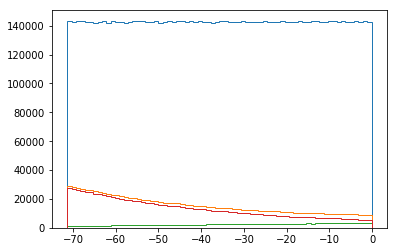

In [15]:
numberbins_z = numberbins
rng = (round(np.min(_chunk_collect.zp_pri),2), round(np.max(_chunk_collect.zp_pri),2))
print('range: '+str(rng)+' \n')

n_z_total, bins_z_total, patches_z_total = plt.hist(_chunk_collect.zp_pri, numberbins_z, weights = None, range = rng, histtype = 'step');
n_z_hits_a, bins_z_hits_a, patches_z_hits_a = plt.hist(_chunk_collect.zp_pri, numberbins_z, weights = _chunk_collect.napmthits, range = rng, histtype = 'step');
n_z_hits_t, bins_z_hits_t, patches_z_hits_t = plt.hist(_chunk_collect.zp_pri, numberbins_z, weights = _chunk_collect.ntpmthits, range = rng, histtype = 'step');
n_z_hits_b, bins_z_hits_b, patches_z_hits_b = plt.hist(_chunk_collect.zp_pri, numberbins_z, weights = _chunk_collect.nbpmthits, range = rng, histtype = 'step');

binscenter_z_total = (bins_z_total[:-1]+bins_z_total[1:])/2
binscenter_z_hits_a = (bins_z_hits_a[:-1]+bins_z_hits_a[1:])/2
binscenter_z_hits_t = (bins_z_hits_t[:-1]+bins_z_hits_t[1:])/2
binscenter_z_hits_b = (bins_z_hits_b[:-1]+bins_z_hits_b[1:])/2

n_z_LCE_a = n_z_hits_a / n_z_total
n_z_LCE_t = n_z_hits_t / n_z_total
n_z_LCE_b = n_z_hits_b / n_z_total

n_z_rLCE_a = n_z_LCE_a / n_z_LCE_a.mean()
n_z_rLCE_t = n_z_LCE_t / n_z_LCE_t.mean()
n_z_rLCE_b = n_z_LCE_b / n_z_LCE_b.mean()

n_z_DE_t = n_z_LCE_t * QE_Top * CE_Top
n_z_DE_b = n_z_LCE_b * QE_Bottom * CE_Bottom
n_z_DE_a = n_z_DE_t + n_z_DE_b

n_z_LY_t = n_z_DE_t/W
n_z_LY_b = n_z_DE_b/W
n_z_LY_a = n_z_DE_a/W

n_z_LY0_t = n_z_DE_t/W0
n_z_LY0_b = n_z_DE_b/W0
n_z_LY0_a = n_z_DE_a/W0

n_z_rLY_a = n_z_LY_a / n_z_LY_a.mean()
n_z_rLY_t = n_z_LY_t / n_z_LY_t.mean()
n_z_rLY_b = n_z_LY_b / n_z_LY_b.mean()

# Average values:
print('LCE_All    = '+str(round(100*n_z_LCE_a.mean(),2))+' %')
print('LCE_Top    =  '+str(round(100*n_z_LCE_t.mean(),2))+' %')
print('LCE_Bottom = '+str(round(100*n_z_LCE_b.mean(),2))+' %\n')
print('DE_All     =  '+str(round(100*n_z_DE_a.mean(),2))+' %')
print('DE_Top     =  '+str(round(100*n_z_DE_t.mean(),2))+' %')
print('DE_Bottom  =  '+str(round(100*n_z_DE_b.mean(),2))+' %\n')
print('LY_All     =  '+str(round(n_z_LY_a.mean(),2))+' pe/keV')
print('LY0_All    =  '+str(round(n_z_LY0_a.mean(),2))+' pe/keV')

LCE_z_hist = pd.DataFrame({'n_total' : [n_z_total,n_z_total,n_z_total], 'n_hits' : [n_z_hits_a,n_z_hits_t,n_z_hits_b], 'bins_z' : [bins_z_hits_a,bins_z_hits_t,bins_z_hits_b], 'binscenter_z' : [binscenter_z_hits_a,binscenter_z_hits_t,binscenter_z_hits_b], 'LCE' : [n_z_LCE_a,n_z_LCE_t,n_z_LCE_b], 'rLCE' : [n_z_rLCE_a,n_z_rLCE_t,n_z_rLCE_b], 'DE' : [n_z_DE_a,n_z_DE_t,n_z_DE_b], 'LY' : [n_z_LY_a,n_z_LY_t,n_z_LY_b], 'LY0' : [n_z_LY0_a,n_z_LY0_t,n_z_LY0_b], 'rLY' : [n_z_rLY_a,n_z_rLY_t,n_z_rLY_b]}, index=['all','top','bottom'])
columns = ['n_total', 'n_hits', 'bins_z', 'binscenter_z', 'LCE', 'rLCE', 'DE', 'LY', 'LY0', 'rLY']
LCE_z_hist.to_pickle(filenameprefix+"_LCE_z_hist.pkl")
        
LCE_z_hist

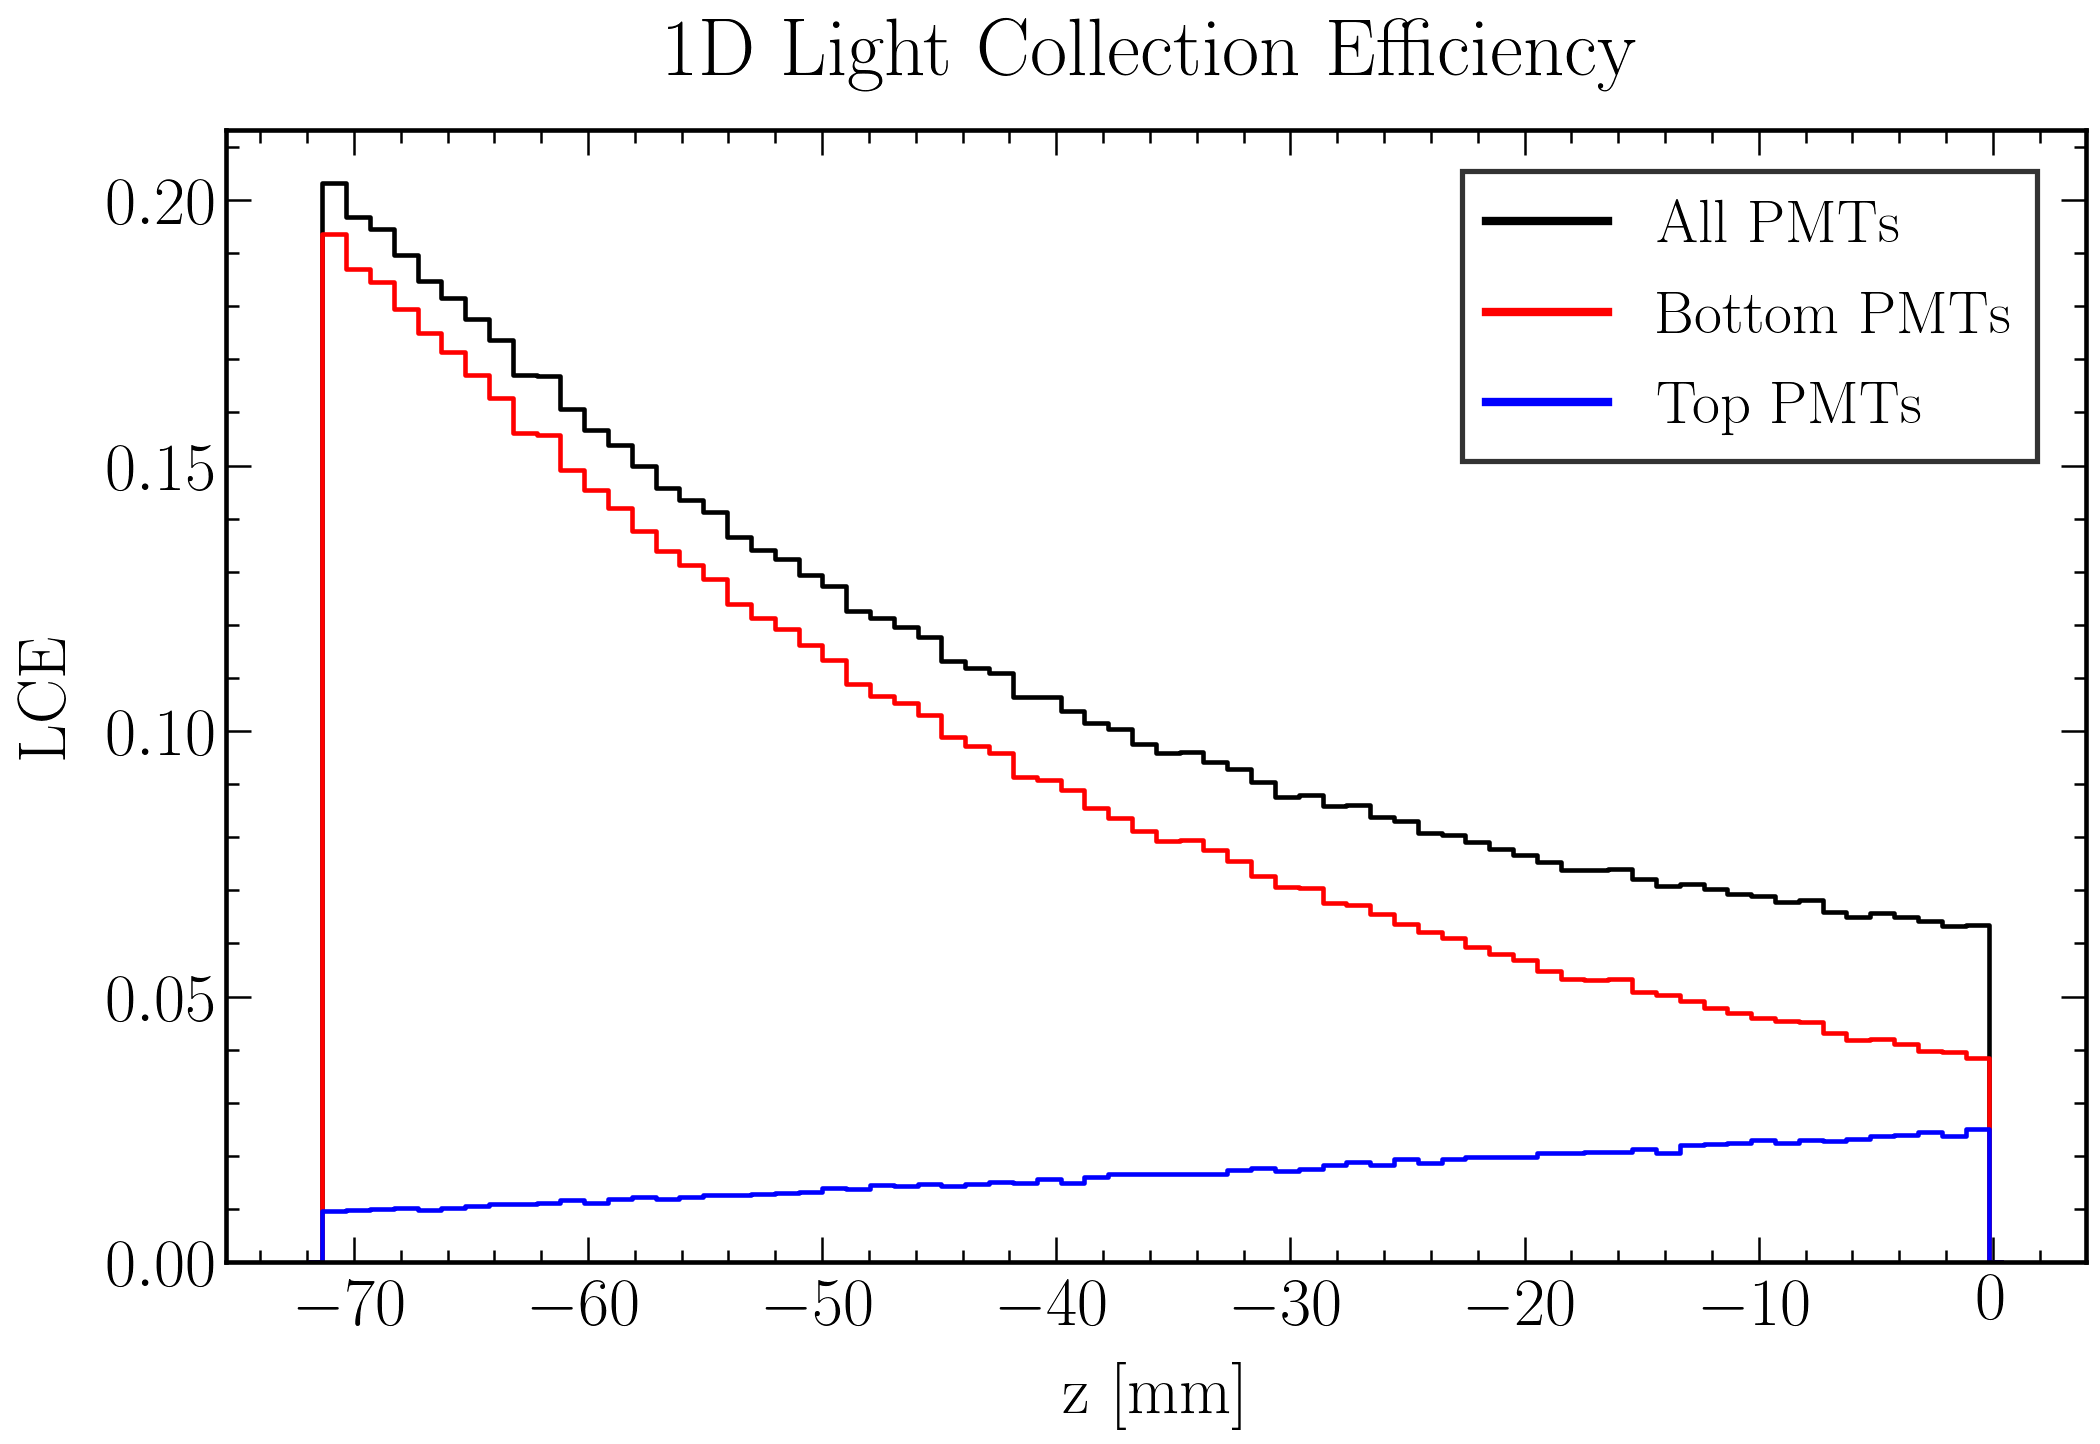

In [16]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')

#numberbins = 70
#n, bins, patches = plt.hist(zp_pri, numberbins, weights = [1/(len(zp_pri)/numberbins)]*len(zp_pri), histtype = 'step', linewidth = 2.2, color = 'k')
'''
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.napmthits/nphotons*numberbins, histtype = 'step', linewidth = 2.2, label = 'All PMTs', color = 'k')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.nbpmthits/nphotons*numberbins, histtype = 'step', linewidth = 2.2, label = 'Bottom PMT', color = 'r')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.ntpmthits/nphotons*numberbins, histtype = 'step', linewidth = 2.2, label = 'Top PMTs', color = 'b')
'''

#plt.ylim(bottom = 0)
plt.ylim(bottom = 0)

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('LCE', fontsize = label_size, labelpad = label_pad)
plt.title('1D Light Collection Efficiency', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_LCE_z_comparison.png")
plt.show()

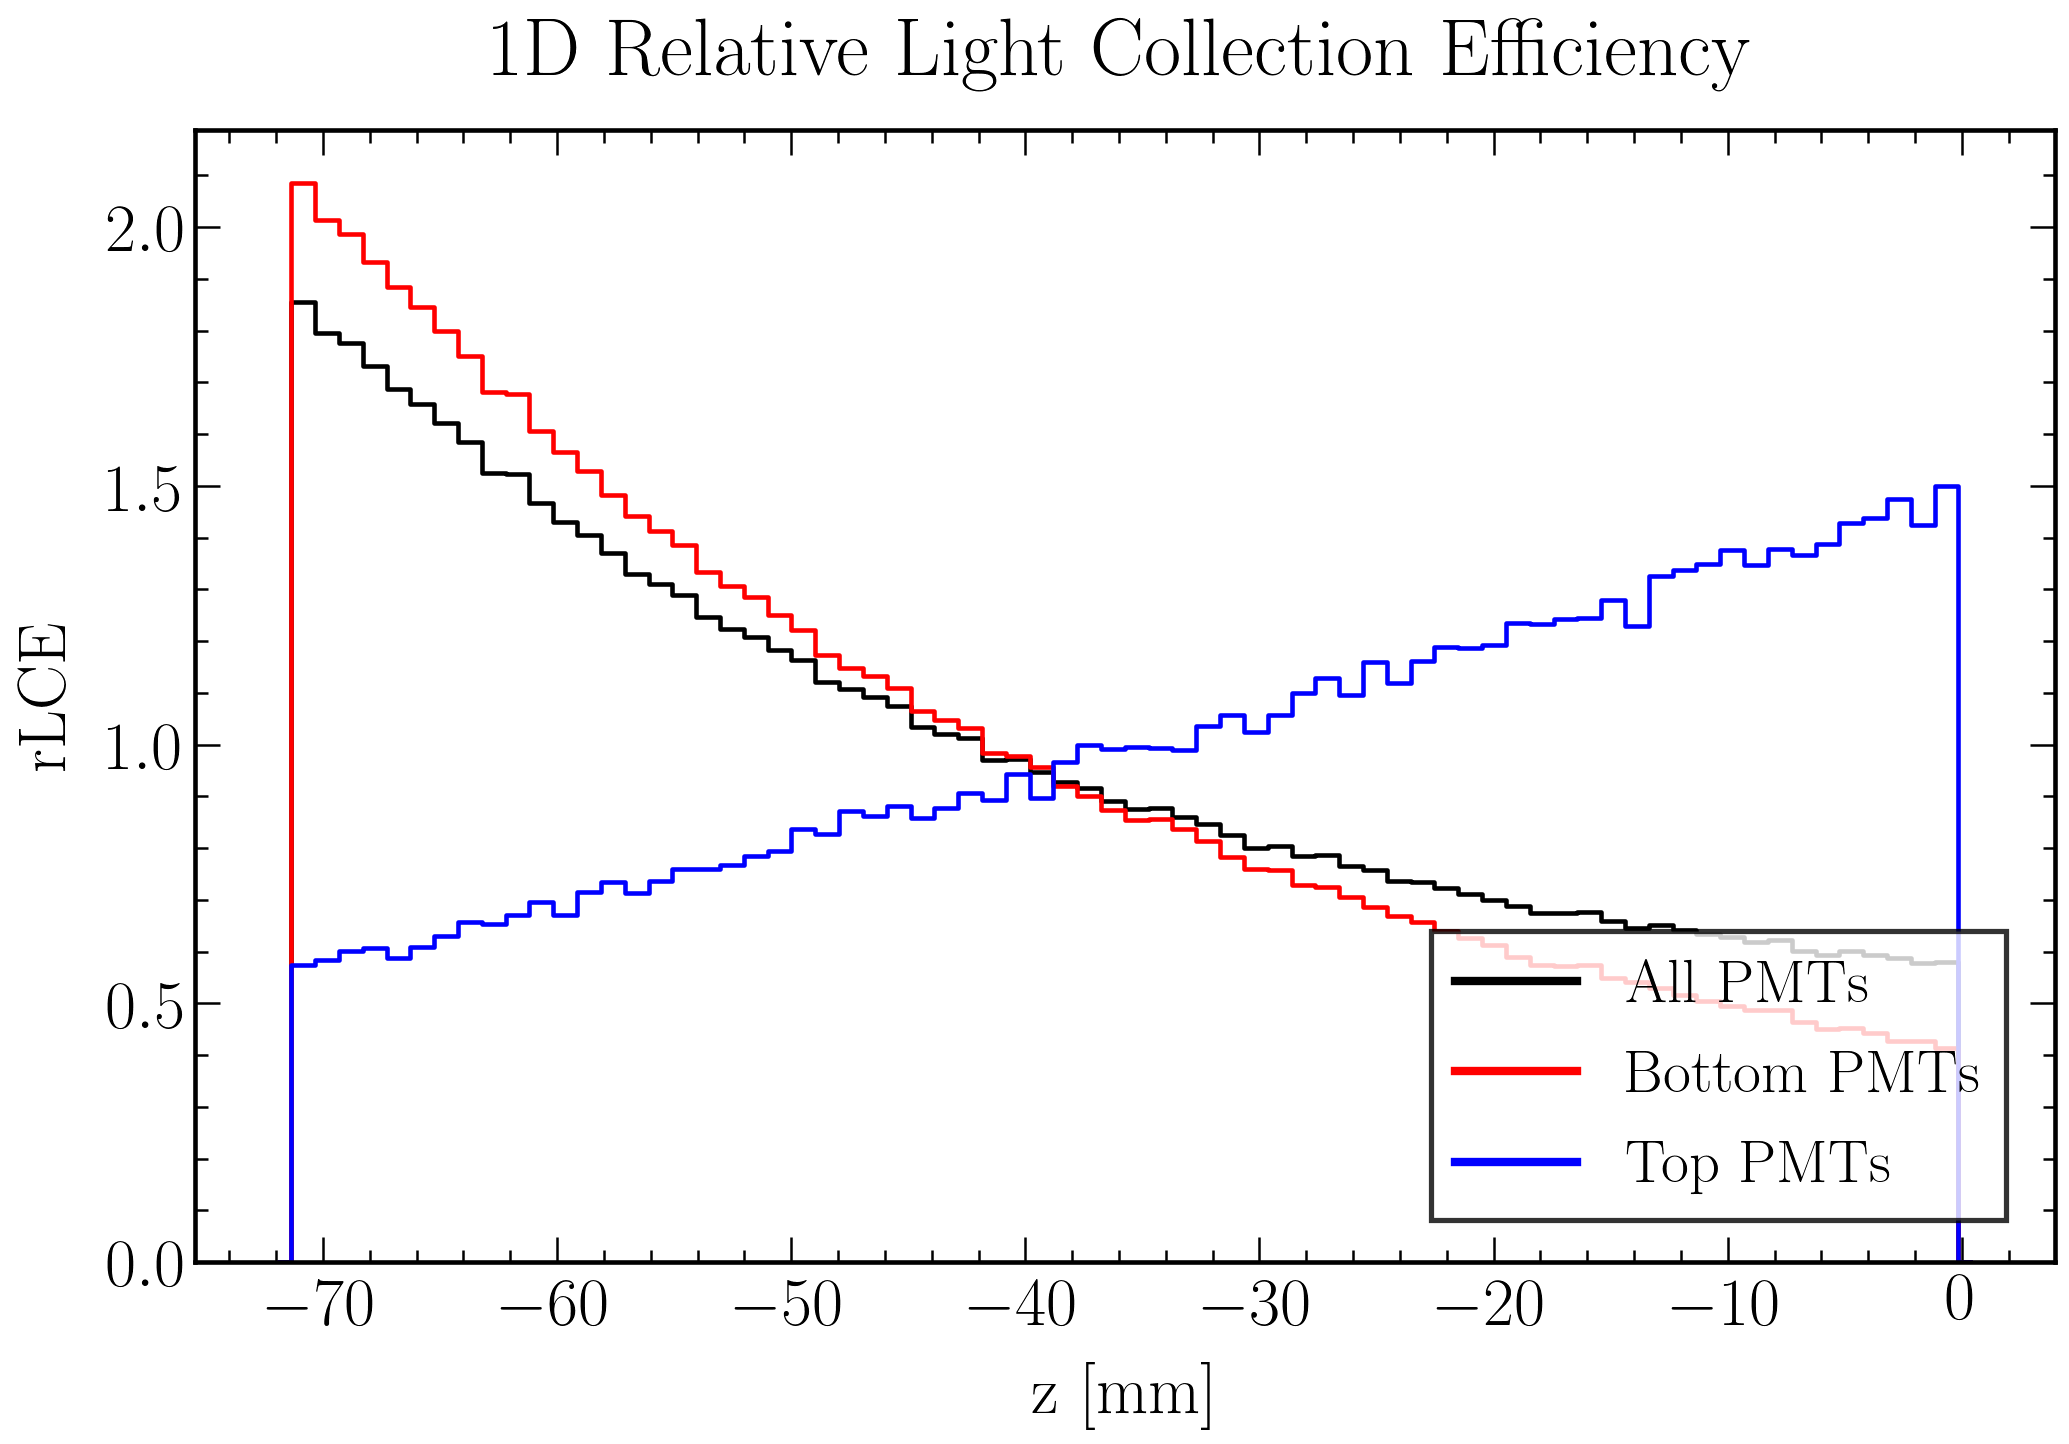

In [17]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['rLCE'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
ns = np.concatenate((np.array([0]), LCE_z_hist['rLCE'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
ns = np.concatenate((np.array([0]), LCE_z_hist['rLCE'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')

plt.ylim(bottom = 0)

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLCE', fontsize = label_size, labelpad = label_pad)
plt.title('1D Relative Light Collection Efficiency', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=4, bbox_to_anchor=(0.99,0.01), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_rLCE_z_comparison.png")
plt.show()

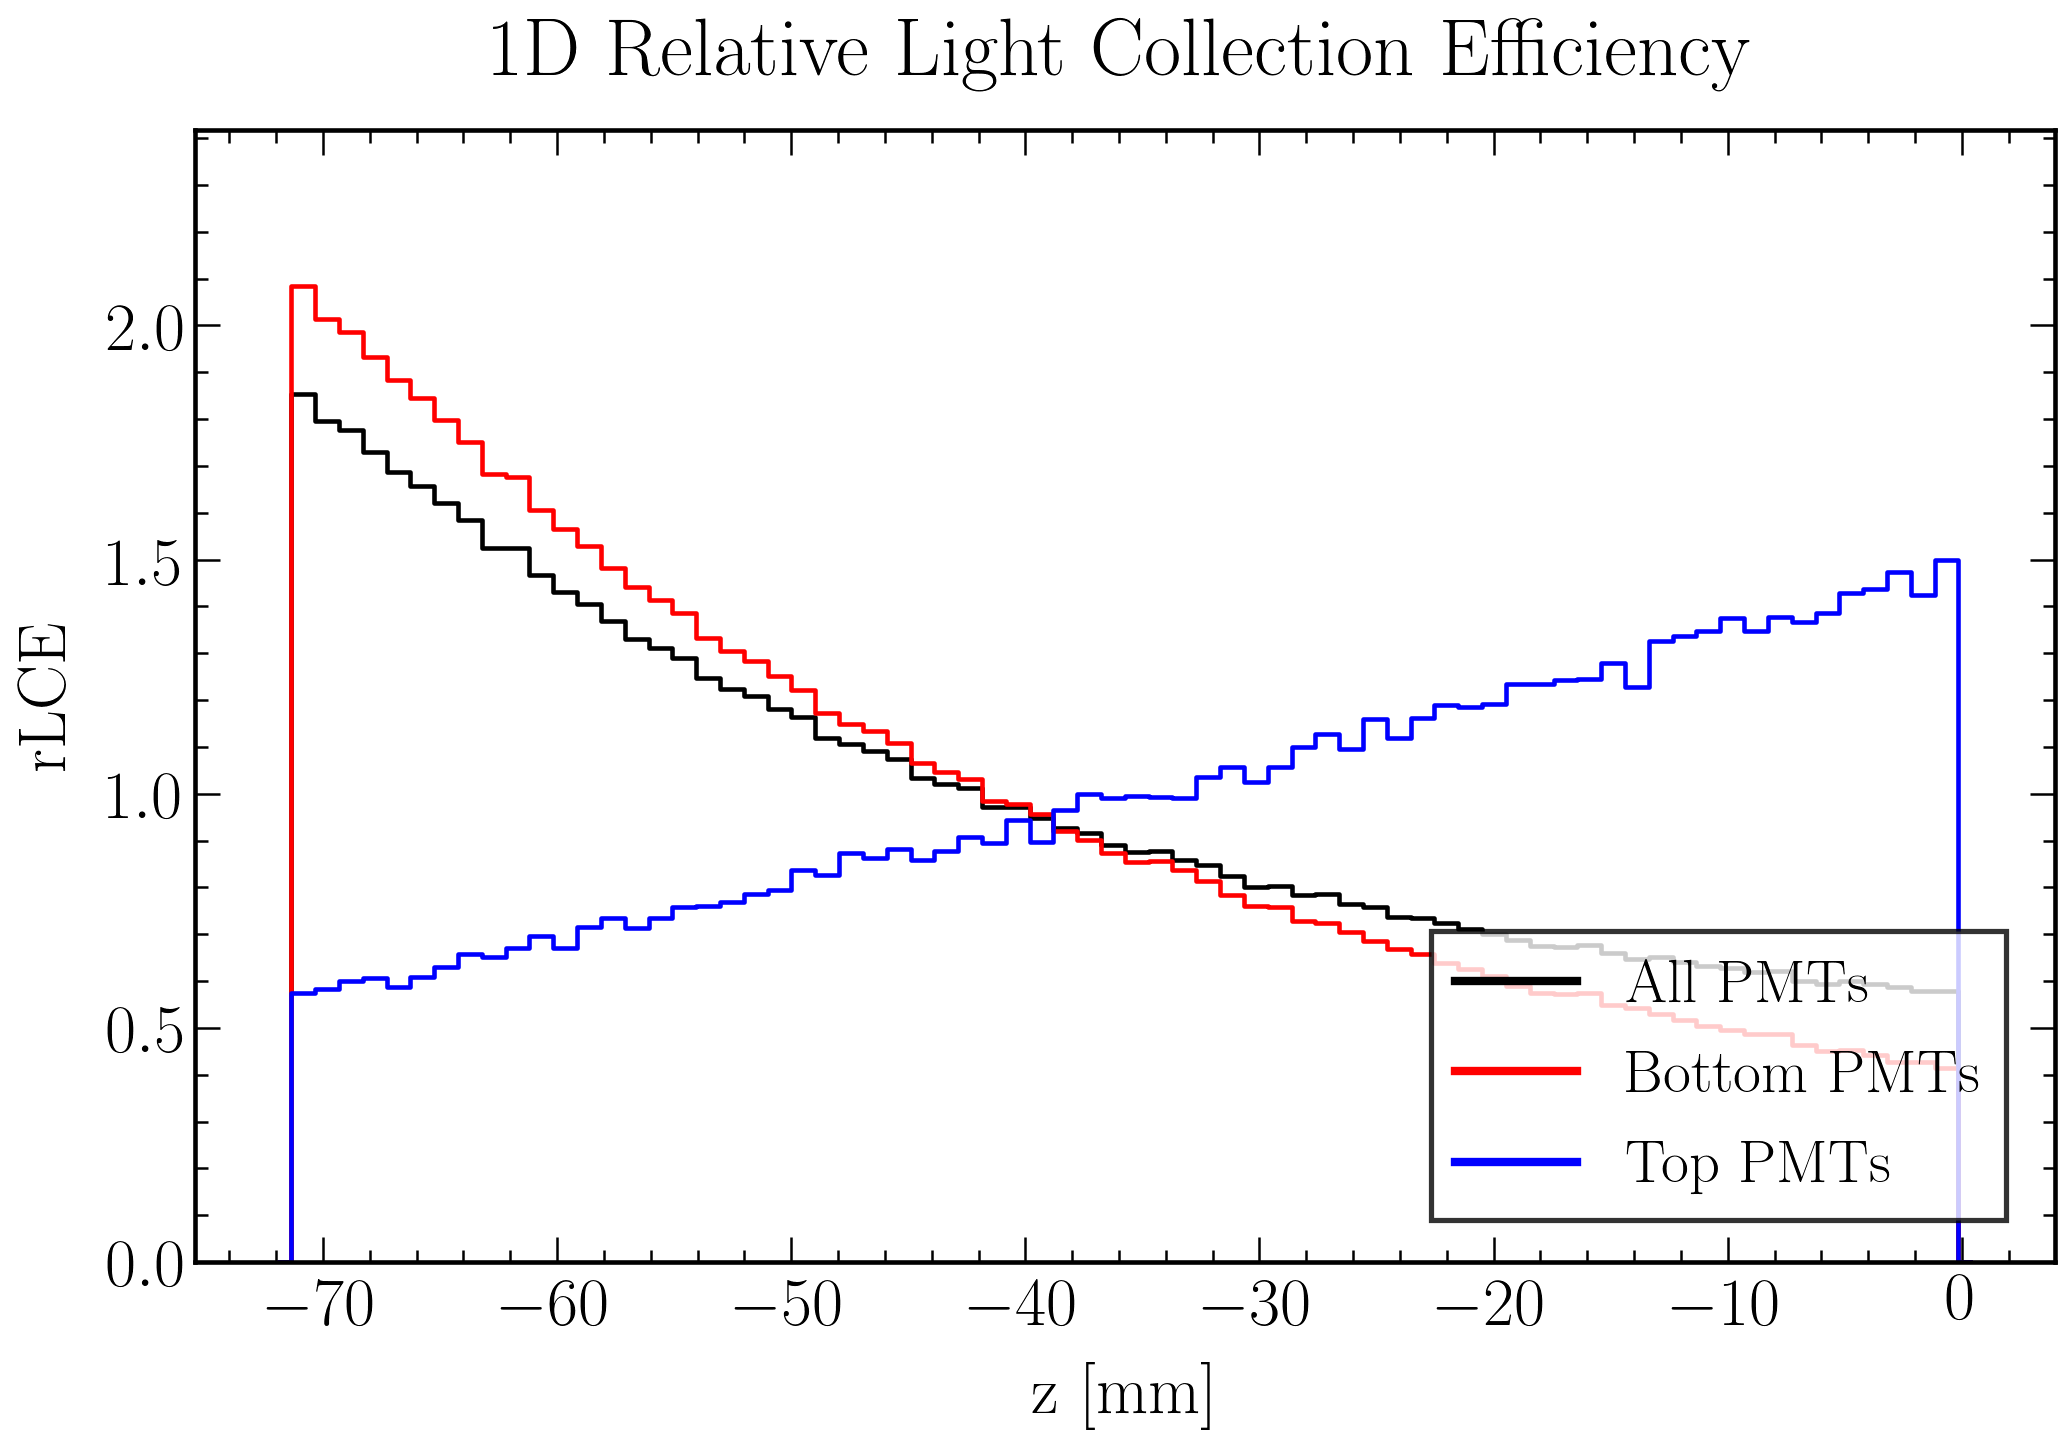

In [18]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['rLCE'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
ns = np.concatenate((np.array([0]), LCE_z_hist['rLCE'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
ns = np.concatenate((np.array([0]), LCE_z_hist['rLCE'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')

plt.ylim(min(np.min(LCE_z_hist['rLCE'].loc['all'])-0.3*(np.max(LCE_z_hist['rLCE'].loc['all'])-
                                          np.min(LCE_z_hist['rLCE'].loc['all'])),
    np.min(LCE_z_hist['rLCE'].loc['top'])-0.3*(np.max(LCE_z_hist['rLCE'].loc['top'])-
                                          np.min(LCE_z_hist['rLCE'].loc['top'])),
    np.min(LCE_z_hist['rLCE'].loc['bottom'])-0.3*(np.max(LCE_z_hist['rLCE'].loc['bottom'])-
                                          np.min(LCE_z_hist['rLCE'].loc['bottom']))),
max(np.max(LCE_z_hist['rLCE'].loc['all'])+0.2*(np.max(LCE_z_hist['rLCE'].loc['all'])-
                                          np.min(LCE_z_hist['rLCE'].loc['all'])),
    np.max(LCE_z_hist['rLCE'].loc['top'])+0.2*(np.max(LCE_z_hist['rLCE'].loc['top'])-
                                          np.min(LCE_z_hist['rLCE'].loc['top'])),
    np.max(LCE_z_hist['rLCE'].loc['bottom'])+0.2*(np.max(LCE_z_hist['rLCE'].loc['bottom'])-
                                          np.min(LCE_z_hist['rLCE'].loc['bottom']))))

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLCE', fontsize = label_size, labelpad = label_pad)
plt.title('1D Relative Light Collection Efficiency', fontsize = title_size, pad = title_pad)

plt.ylim(bottom = 0)

# Legend
leg = plt.legend(loc=4, bbox_to_anchor=(0.99,0.01), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_rLCE_z_comparison_scaled.png")
plt.show()

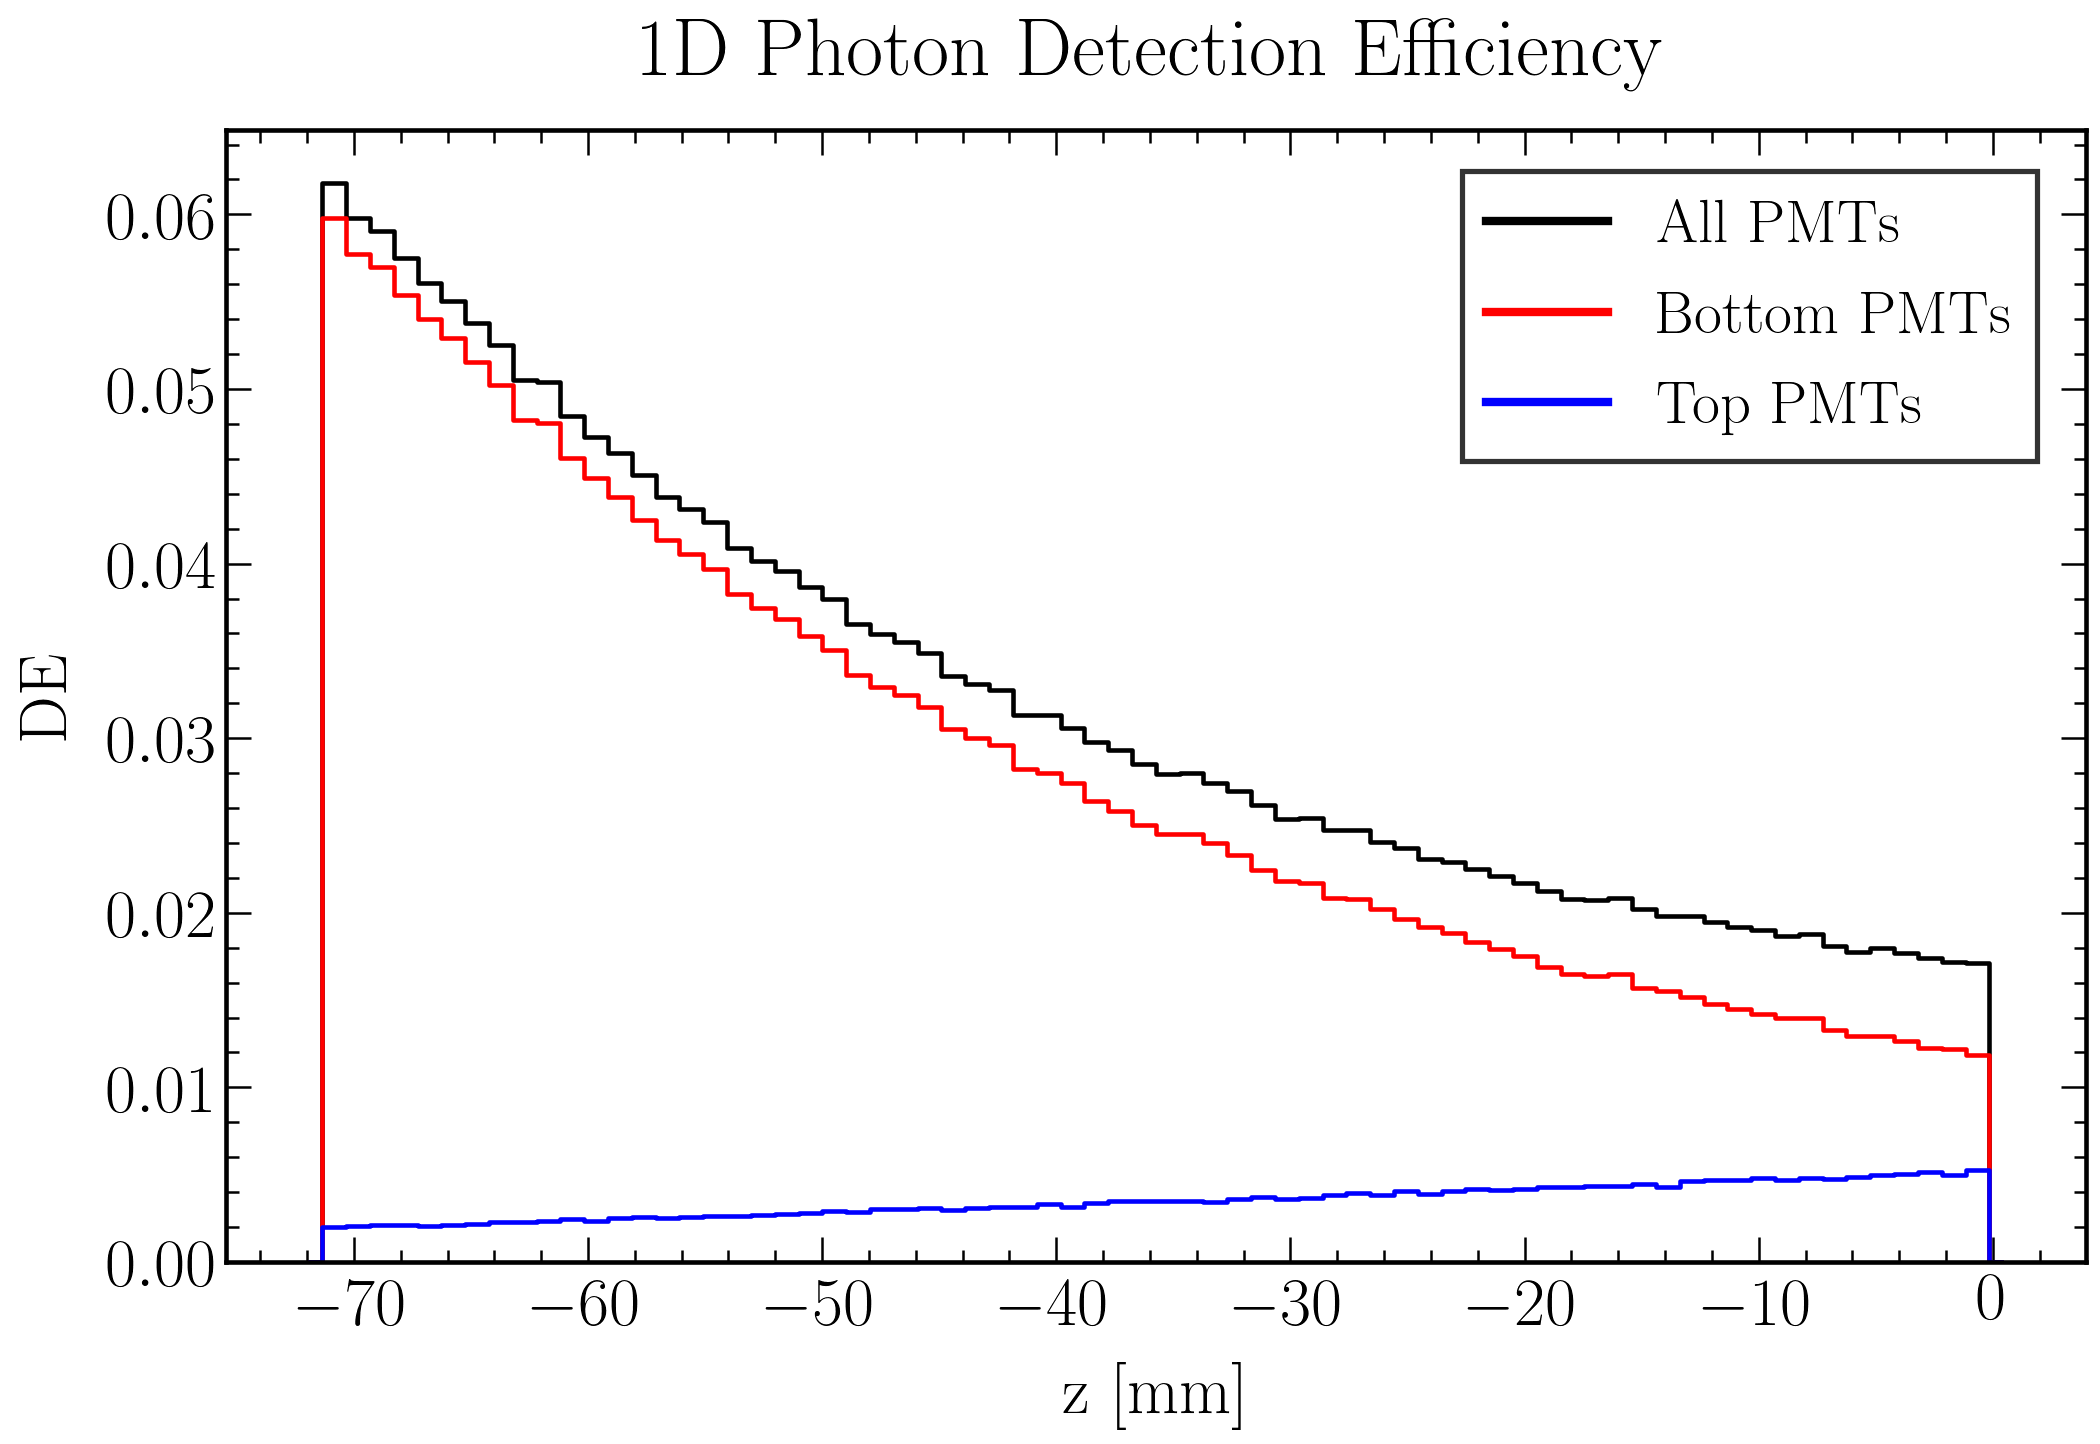

In [19]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

#numberbins = 70

# Data plot
bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['DE'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
ns = np.concatenate((np.array([0]), LCE_z_hist['DE'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
ns = np.concatenate((np.array([0]), LCE_z_hist['DE'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')

'''
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwAll*numberbins, histtype = 'step', linewidth = 2.2, label = 'All PMTs', color = 'k')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwBottom*numberbins, histtype = 'step', linewidth = 2.2, label = 'Bottom PMT', color = 'r')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwTop*numberbins, histtype = 'step', linewidth = 2.2, label = 'Top PMTs', color = 'b')
'''
plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('DE', fontsize = label_size, labelpad = label_pad)
plt.title('1D Photon Detection Efficiency', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
#plt.xlim(0,100)
#plt.ylim(-10,180)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')
#plt.ylim(bottom = 0)
plt.ylim(bottom = 0)

fig.savefig(filenameprefix+"_DE_z_comparison.png")
plt.show()

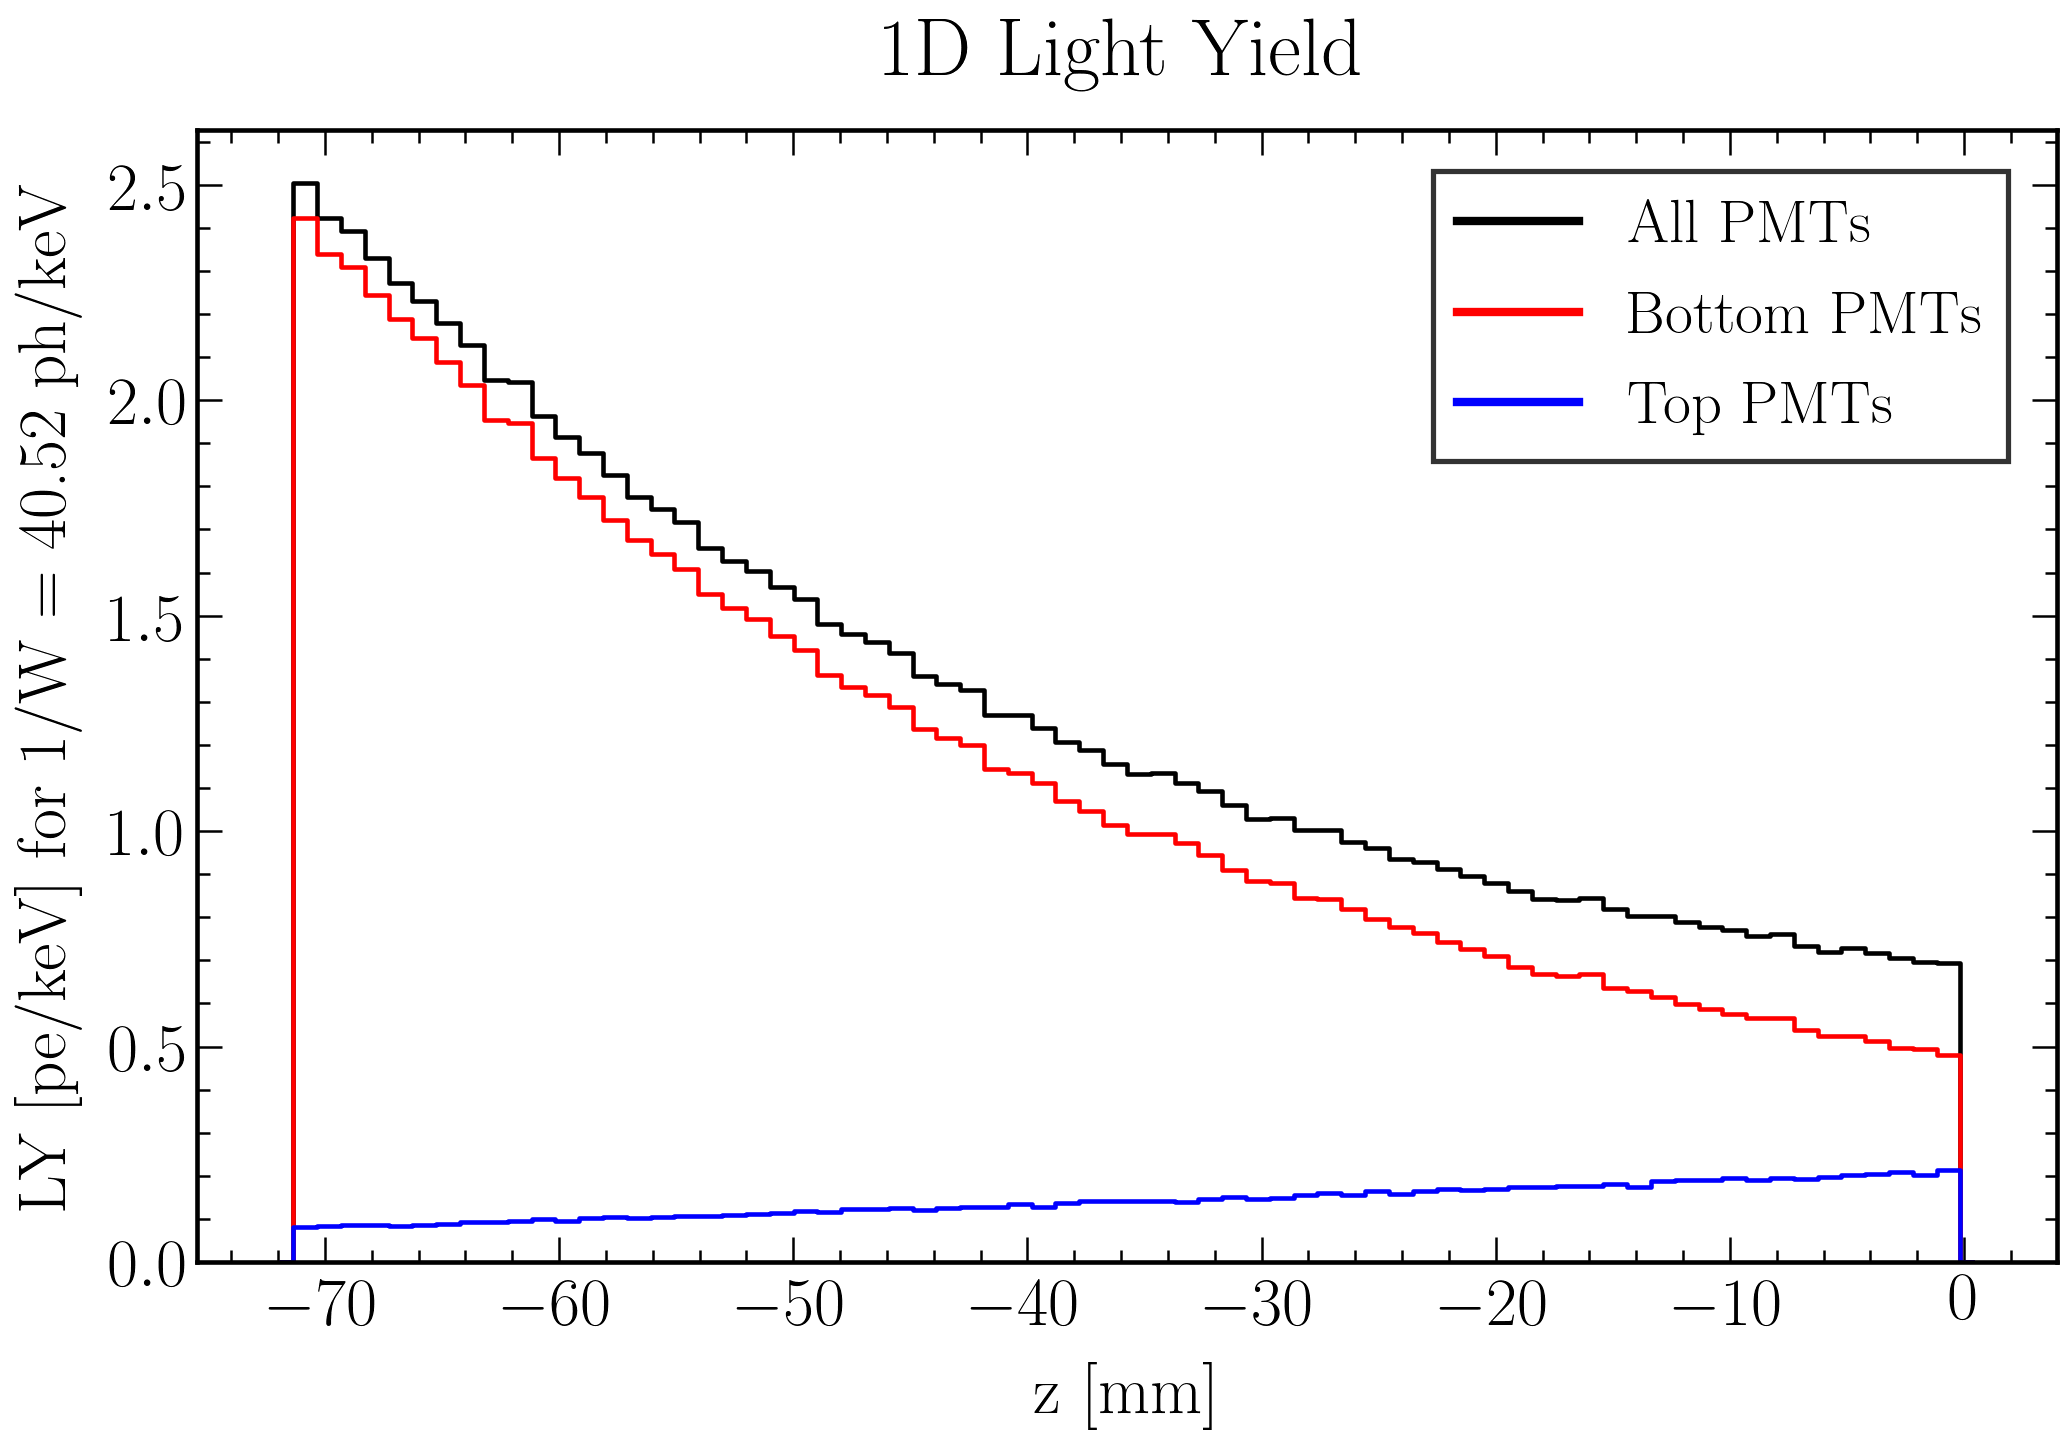

In [20]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

#numberbins = 70

# Data plot
bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['LY'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
ns = np.concatenate((np.array([0]), LCE_z_hist['LY'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
ns = np.concatenate((np.array([0]), LCE_z_hist['LY'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')

'''
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwAll*numberbins, histtype = 'step', linewidth = 2.2, label = 'All PMTs', color = 'k')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwBottom*numberbins, histtype = 'step', linewidth = 2.2, label = 'Bottom PMT', color = 'r')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwTop*numberbins, histtype = 'step', linewidth = 2.2, label = 'Top PMTs', color = 'b')
'''
plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('LY [pe/keV] for 1/W = '+str(round(1/W,2))+' ph/keV', fontsize = label_size, labelpad = label_pad)
plt.title('1D Light Yield', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
#plt.xlim(0,100)
#plt.ylim(-10,180)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')
plt.ylim(bottom = 0)

fig.savefig(filenameprefix+"_LY_z_comparison.png")
plt.show()

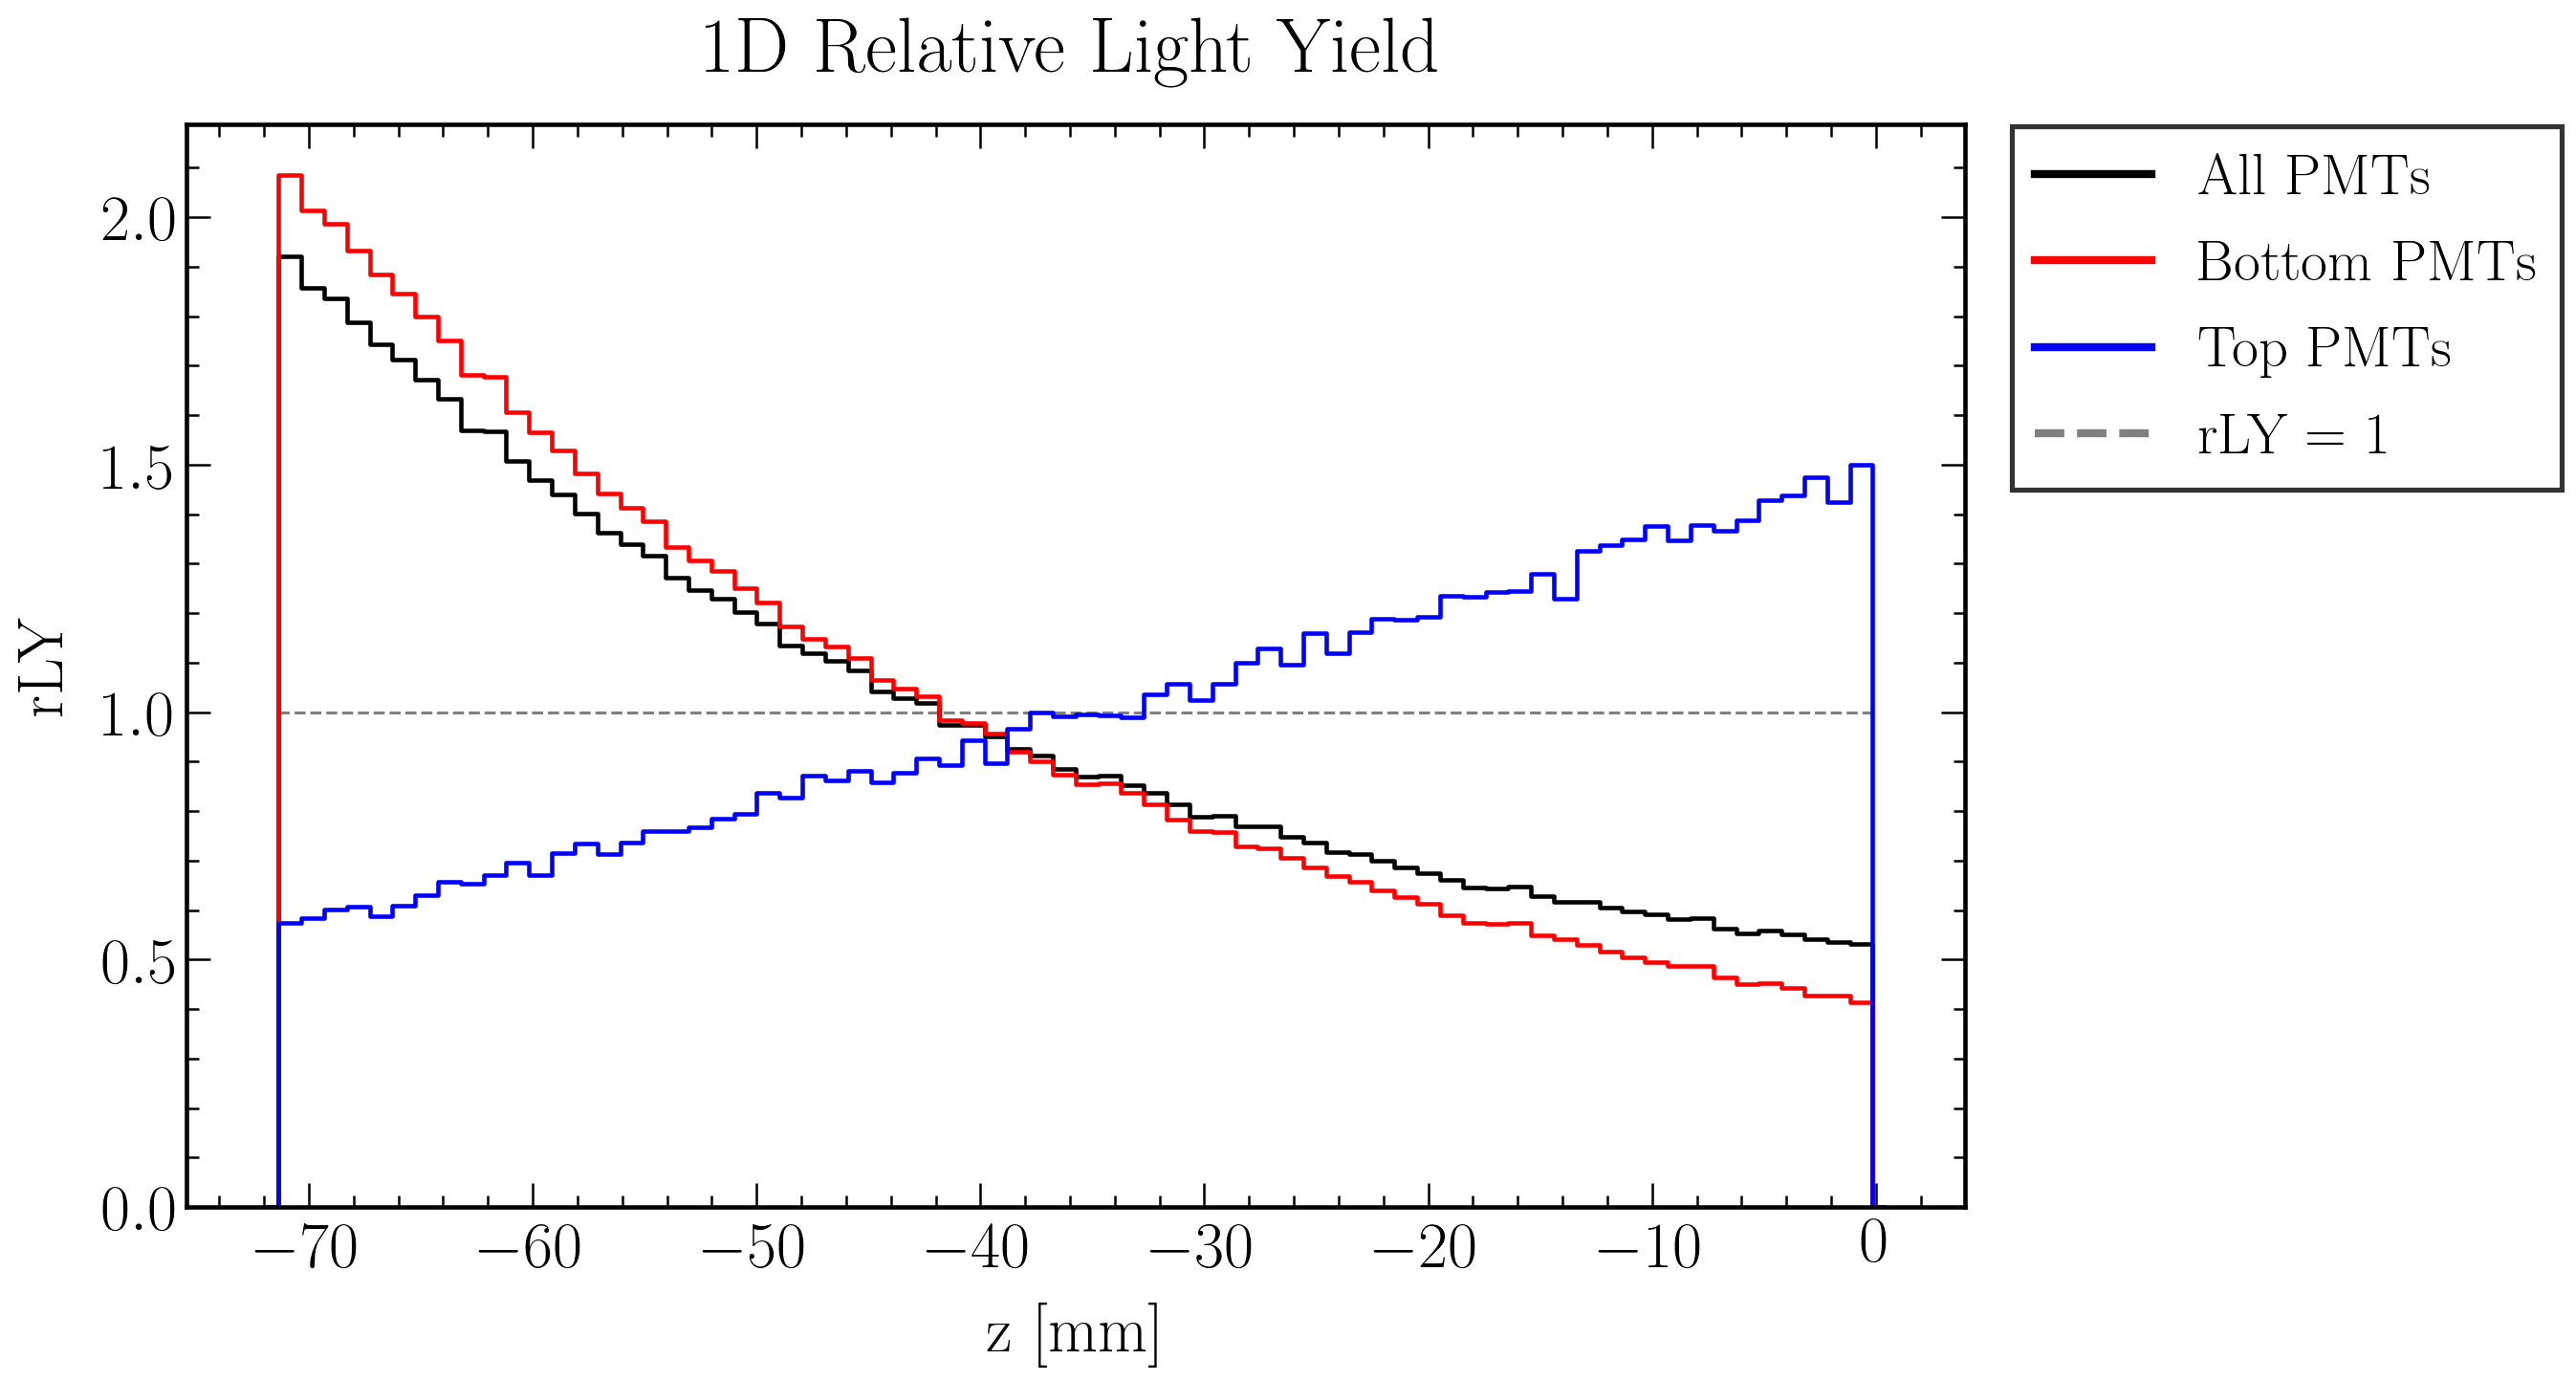

In [21]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

#numberbins = 70

# Data plot

plt.hlines(1, -71.35, -0.15, colors='gray', linestyles='dashed', label = 'rLY = 1')

bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['rLY'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
ns = np.concatenate((np.array([0]), LCE_z_hist['rLY'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
ns = np.concatenate((np.array([0]), LCE_z_hist['rLY'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')

'''
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwAll*numberbins, histtype = 'step', linewidth = 2.2, label = 'All PMTs', color = 'k')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwBottom*numberbins, histtype = 'step', linewidth = 2.2, label = 'Bottom PMT', color = 'r')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwTop*numberbins, histtype = 'step', linewidth = 2.2, label = 'Top PMTs', color = 'b')
'''
plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLY', fontsize = label_size, labelpad = label_pad)
plt.title('1D Relative Light Yield', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
#plt.xlim(0,100)
#plt.ylim(-10,180)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')
plt.ylim(bottom = 0)
#plt.ylim(0.9*np.min(LCE_z_hist['rLY'].loc['top']), 1.1*np.max(LCE_z_hist['rLY'].loc['bottom']))

fig.savefig(filenameprefix+"_rLY_z_comparison.png", bbox_inches='tight')
plt.show()

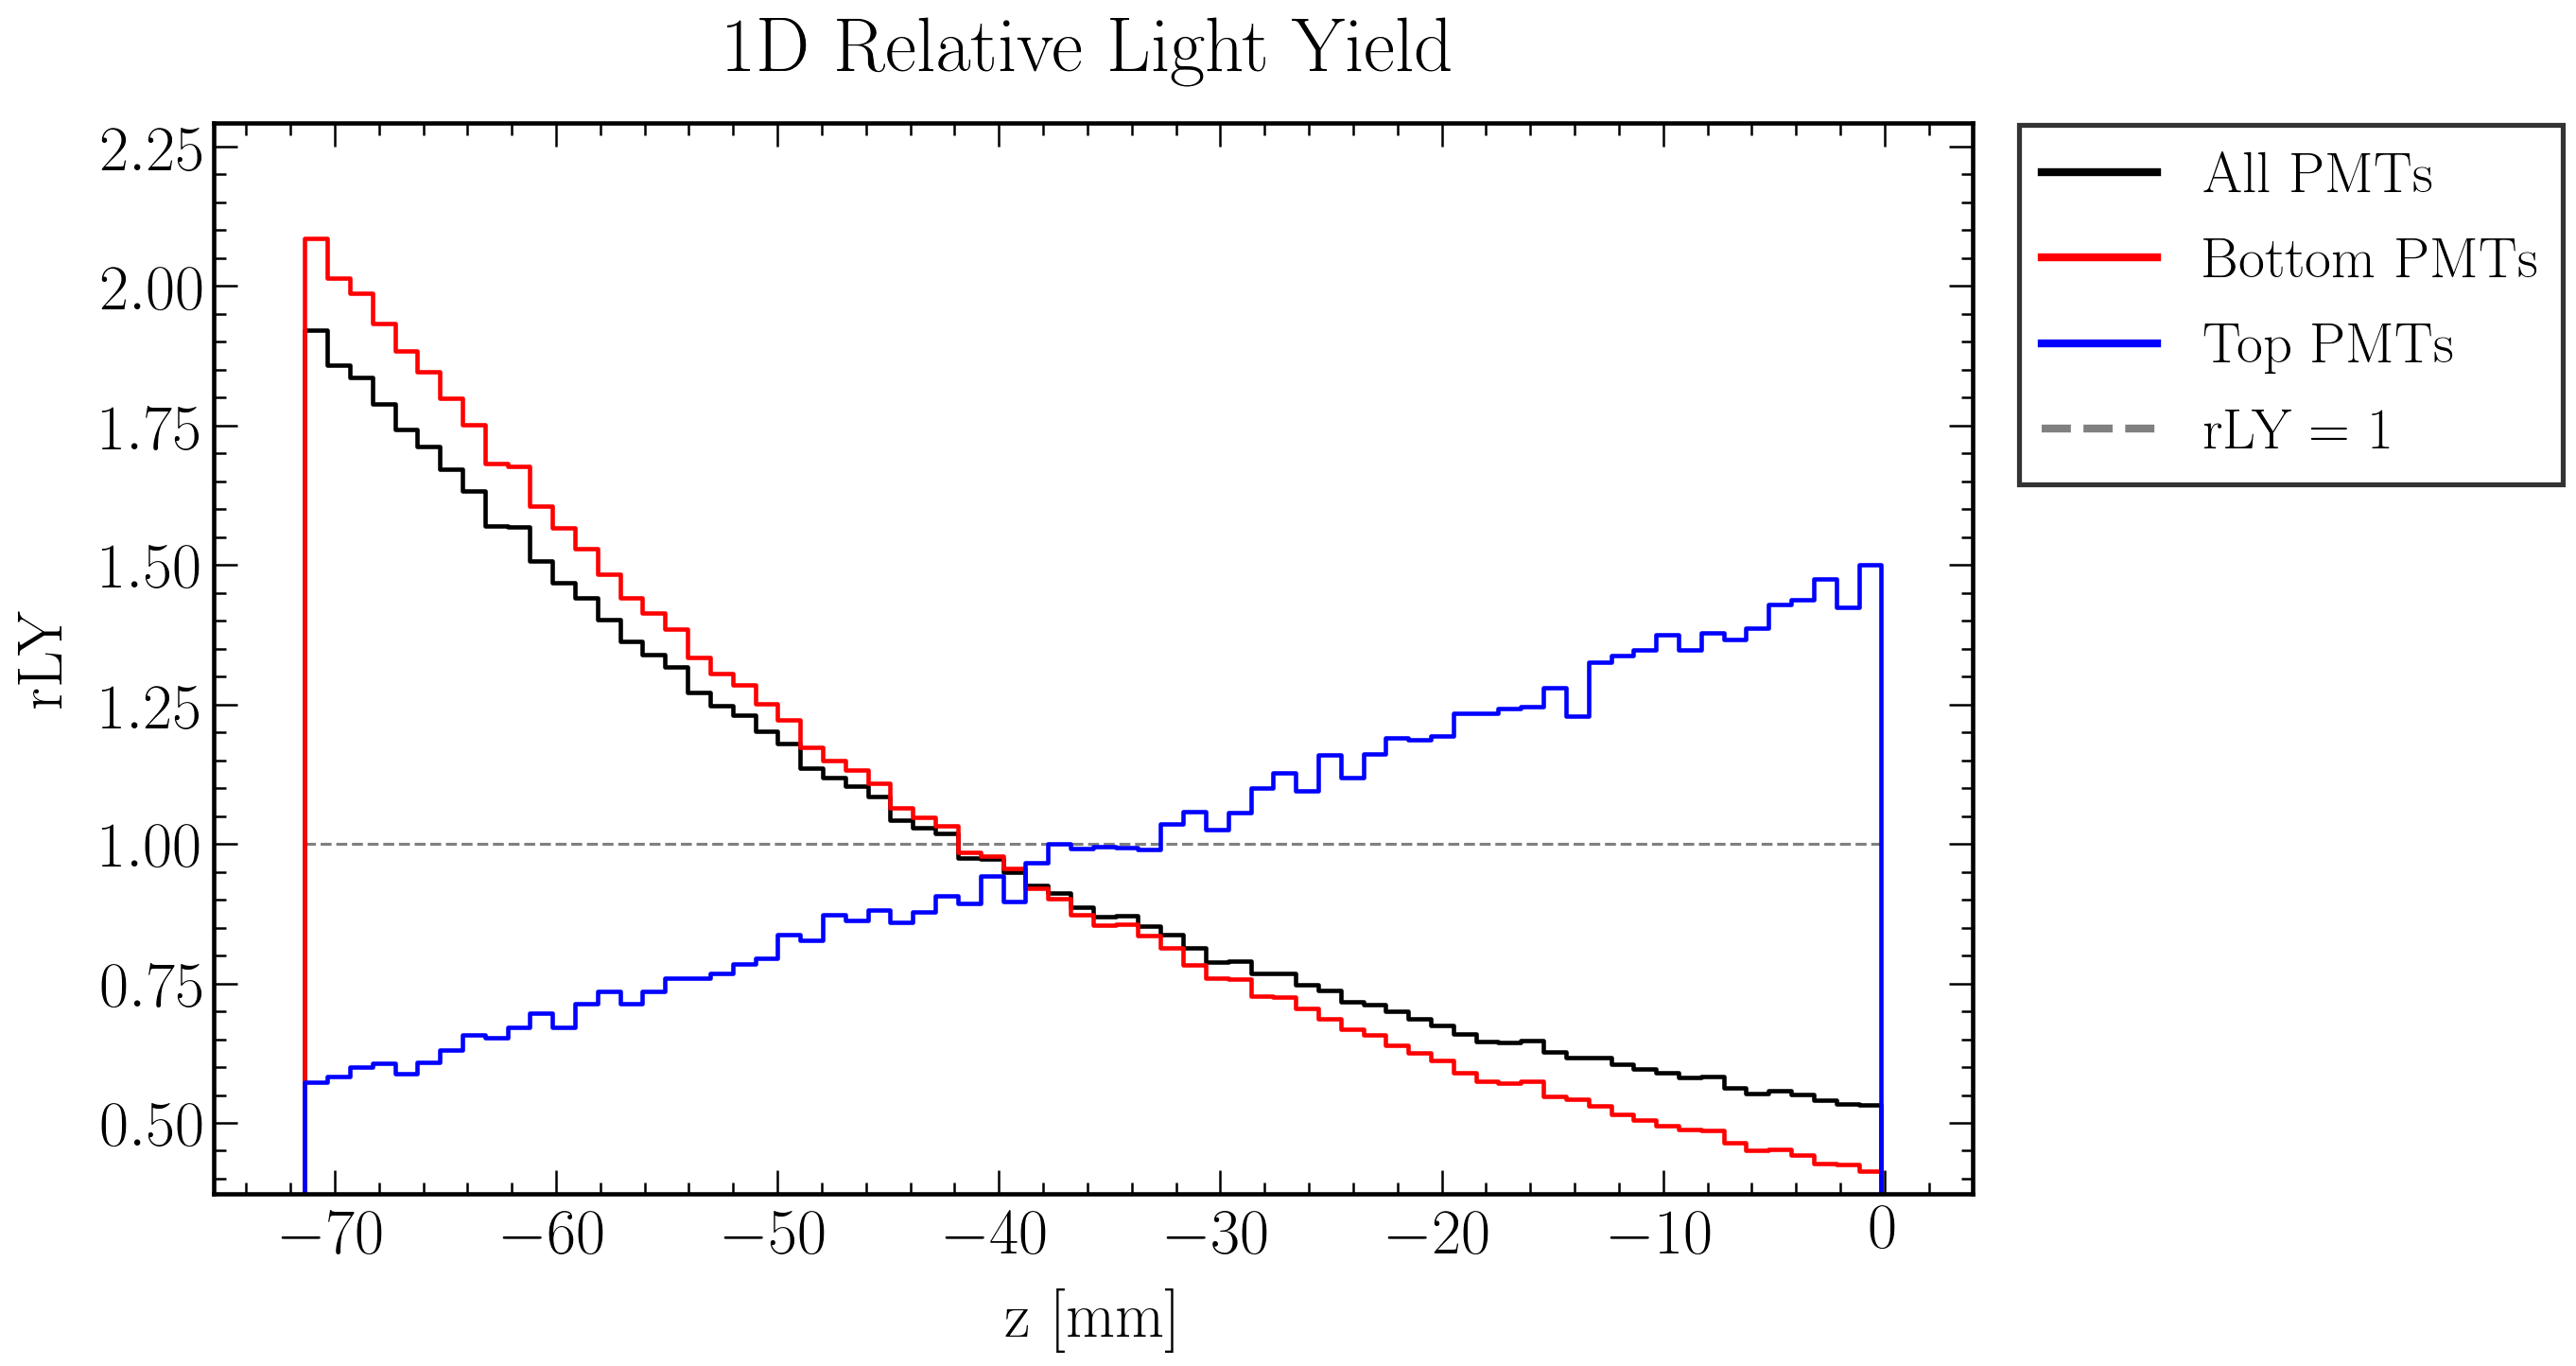

In [22]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

#numberbins = 70

# Data plot

plt.hlines(1, -71.35, -0.15, colors='gray', linestyles='dashed', label = 'rLY = 1')

bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['rLY'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
ns = np.concatenate((np.array([0]), LCE_z_hist['rLY'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
ns = np.concatenate((np.array([0]), LCE_z_hist['rLY'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')

'''
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwAll*numberbins, histtype = 'step', linewidth = 2.2, label = 'All PMTs', color = 'k')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwBottom*numberbins, histtype = 'step', linewidth = 2.2, label = 'Bottom PMT', color = 'r')
n, bins, patches = plt.hist(_chunk_collect.zp_pri, numberbins, weights = _chunk_collect.DEwTop*numberbins, histtype = 'step', linewidth = 2.2, label = 'Top PMTs', color = 'b')
'''
plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLY', fontsize = label_size, labelpad = label_pad)
plt.title('1D Relative Light Yield', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
#plt.xlim(0,100)
#plt.ylim(-10,180)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')
#plt.ylim(bottom = 0)
plt.ylim(0.9*np.min([np.min(LCE_z_hist['rLY'].loc['top']), 
       np.min(LCE_z_hist['rLY'].loc['bottom']), 
       np.min(LCE_z_hist['rLY'].loc['all'])]), 
         1.1*np.max([np.max(LCE_z_hist['rLY'].loc['top']), 
       np.max(LCE_z_hist['rLY'].loc['bottom']), 
       np.max(LCE_z_hist['rLY'].loc['all'])]))

fig.savefig(filenameprefix+"_rLY_z_comparison_scaled.png", bbox_inches='tight')
plt.show()